### **ECG ANALYSIS SAMPLE**

#### **LOADING IMAGE FILE**

In [5]:
from skimage.io import imread
from skimage import color
import matplotlib.pyplot as plt

fig0 , ax0 = plt.subplots()

fig0.set_size_inches(20, 20)

image=imread('/content/Normal(2).jpg')

ax0.imshow(image)
plt.show()

ModuleNotFoundError: No module named 'skimage'

#### **DIVIDING AN ECG INTO LEADS FOR PROCESSING**

In [ ]:
#dividing the ECG leads from 1-13 from the above image
Lead_1 = image[300:600, 150:643]
Lead_2 = image[300:600, 646:1135]
Lead_3 = image[300:600, 1140:1625]
Lead_4 = image[300:600, 1630:2125]
Lead_5 = image[600:900, 150:643]
Lead_6 = image[600:900, 646:1135]
Lead_7 = image[600:900, 1140:1625]
Lead_8 = image[600:900, 1630:2125]
Lead_9 = image[900:1200, 150:643]
Lead_10 = image[900:1200, 646:1135]
Lead_11 = image[900:1200, 1140:1625]
Lead_12 = image[900:1200, 1630:2125]
Lead_13 = image[1250:1480, 150:2125]

Leads=[Lead_1,Lead_2,Lead_3,Lead_4,Lead_5,Lead_6,Lead_7,Lead_8,Lead_9,Lead_10,Lead_11,Lead_12,Lead_13]

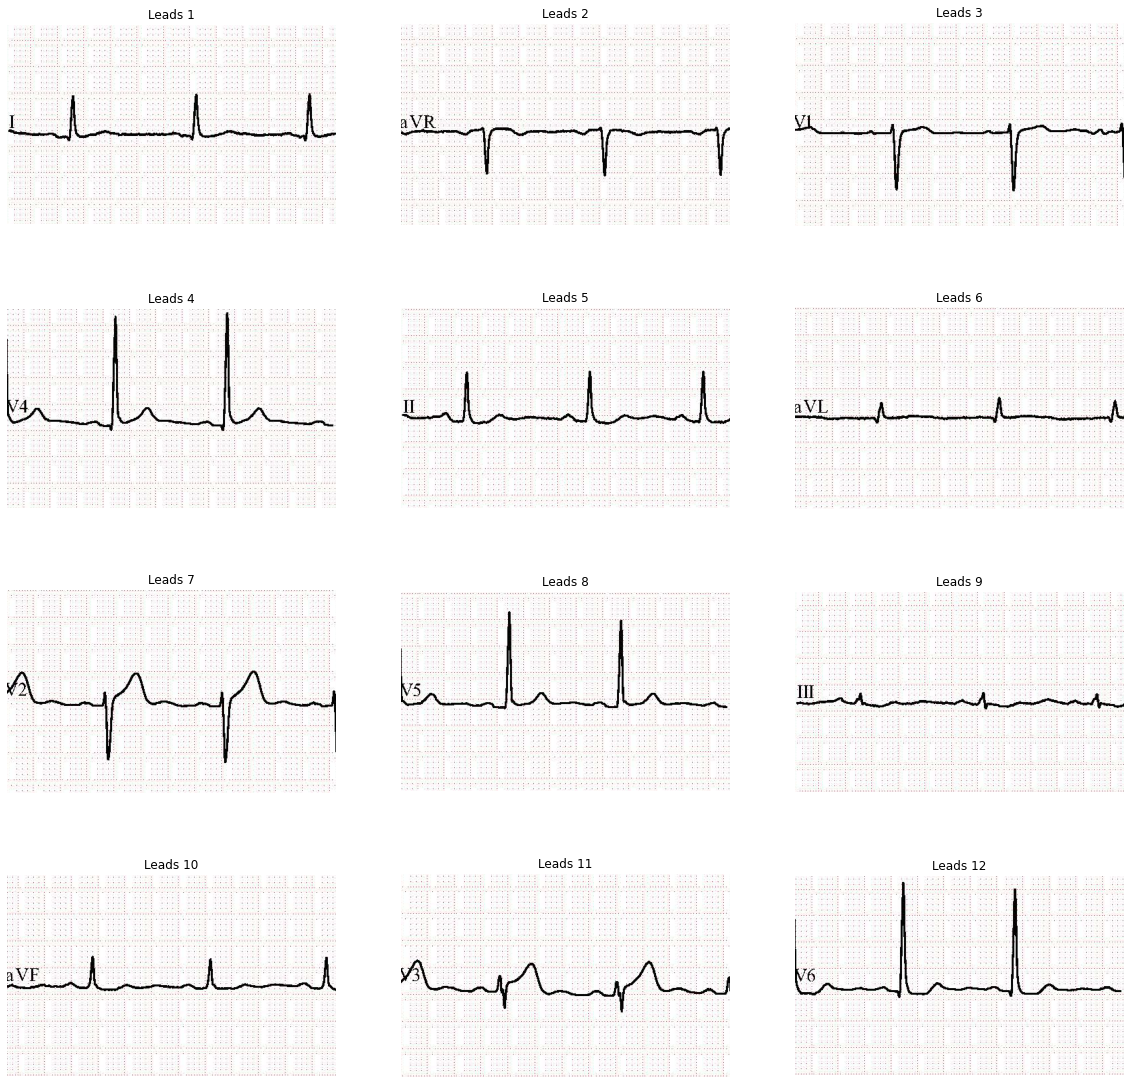

In [ ]:
from skimage.segmentation import slic
from skimage.color import label2rgb

#plotting lead 1-12
fig , ax = plt.subplots(4,3)

fig.set_size_inches(20, 20)

x_counter=0
y_counter=0


for x,y in enumerate(Leads[:len(Leads)-1]):
  if (x+1)%3==0:
    ax[x_counter][y_counter].imshow(y)
    ax[x_counter][y_counter].axis('off')
    ax[x_counter][y_counter].set_title("Leads {}".format(x+1))
    x_counter+=1
    y_counter=0
  else:
    ax[x_counter][y_counter].imshow(y)
    ax[x_counter][y_counter].axis('off')
    ax[x_counter][y_counter].set_title("Leads {}".format(x+1))
    y_counter+=1

#plot the image
plt.show()

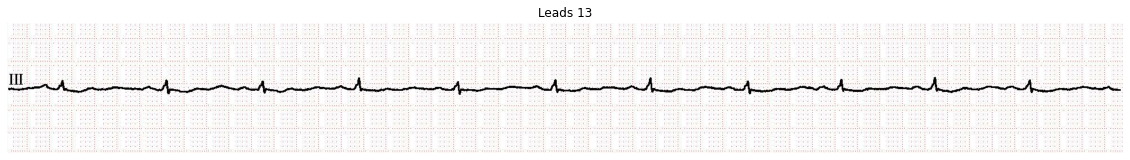

In [ ]:
#plotting lead 13
fig1 , ax1 = plt.subplots()
fig1.set_size_inches(20, 20)

ax1.imshow(Lead_13)
ax1.set_title("Leads 13")
ax1.axis('off')
plt.show()

#### **TRANSFORMAING ECG IMAGES: REMOVING GRIDLINES/ PERFROM THRESHOLDING,  BINARIZATION, GAUSSIAN FILTERING**

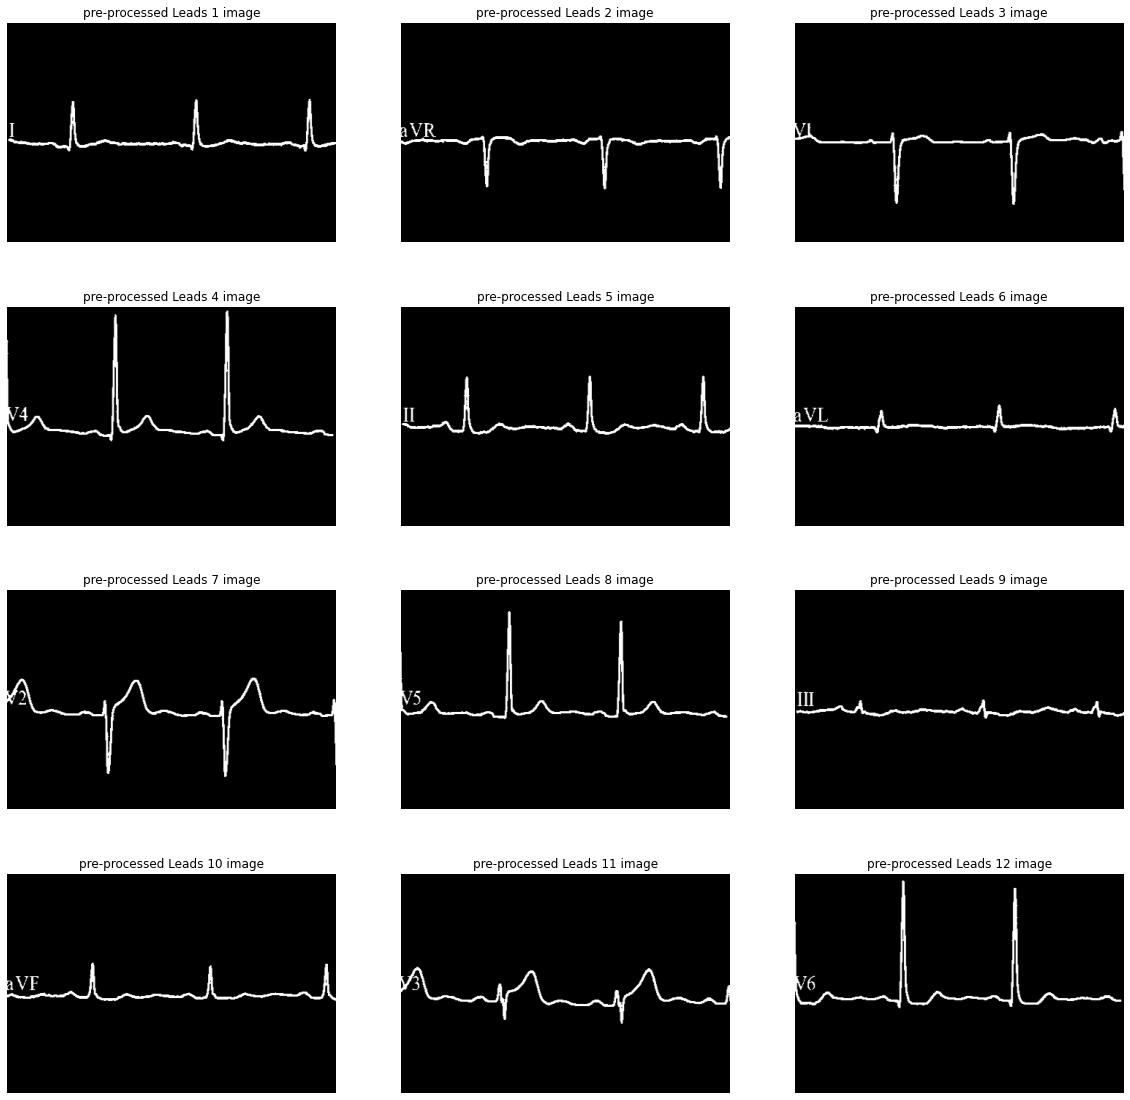

In [ ]:
#importing gaussian filter and otsu threshold
from skimage.filters import threshold_otsu,gaussian
from skimage.transform import resize
from numpy import asarray

#creating subplot of size(4,3) 4 rows and 3 columns
fig2 , ax2 = plt.subplots(4,3)

fig2.set_size_inches(20, 20)

#setting counter for plotting based on value
x_counter=0
y_counter=0

#looping through image list containg all leads from 1-12
for x,y in enumerate(Leads[:len(Leads)-1]):
  #converting to gray scale
  grayscale = color.rgb2gray(y)
  #smoothing image
  blurred_image = gaussian(grayscale, sigma=0.7)
  #thresholding to distinguish foreground and background
  #using otsu thresholding for getting threshold value
  global_thresh = threshold_otsu(blurred_image)

  #creating binary image based on threshold
  binary_global = blurred_image < global_thresh
  #resize image
  binary_global = resize(binary_global, (300, 450))

  if (x+1)%3==0:
    ax2[x_counter][y_counter].imshow(binary_global,cmap="gray")
    ax2[x_counter][y_counter].axis('off')
    ax2[x_counter][y_counter].set_title("pre-processed Leads {} image".format(x+1))
    x_counter+=1
    y_counter=0
  else:
    ax2[x_counter][y_counter].imshow(binary_global,cmap="gray")
    ax2[x_counter][y_counter].axis('off')
    ax2[x_counter][y_counter].set_title("pre-processed Leads {} image".format(x+1))
    y_counter+=1
 
#plot the image
plt.show()

0.5587717312339309


(-0.5, 484.5, 299.5, -0.5)

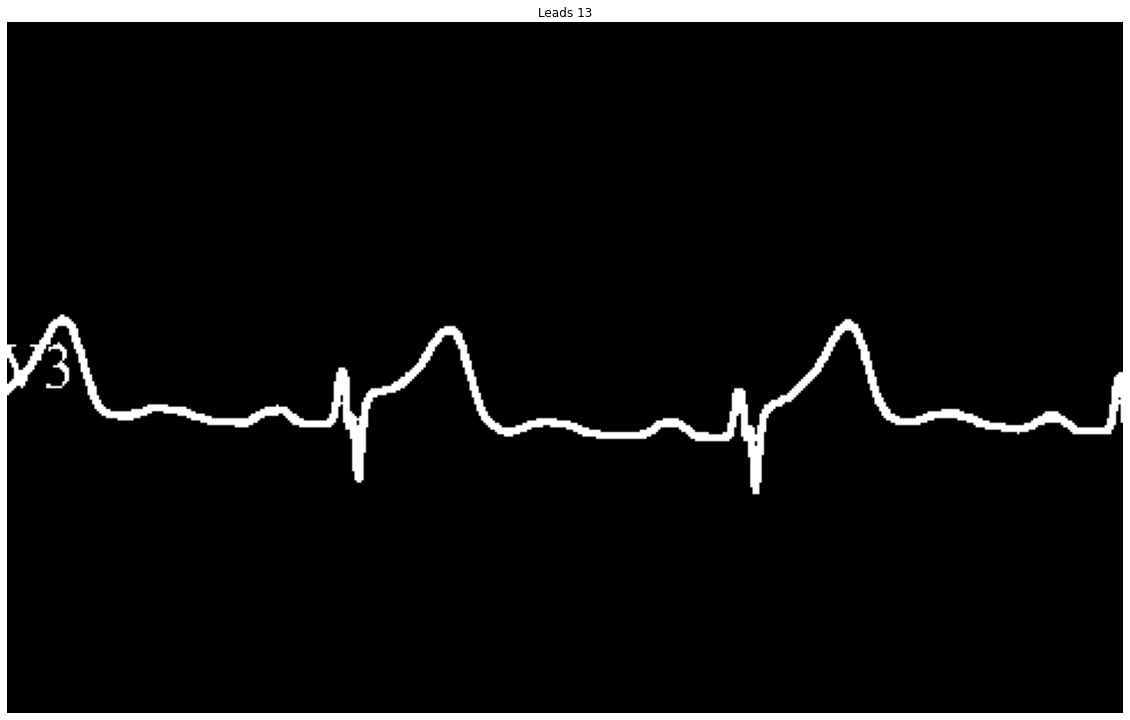

In [ ]:
#plotting lead 13
fig3 , ax3 = plt.subplots()
fig3.set_size_inches(20, 20)

#converting to gray scale
grayscale = color.rgb2gray(Lead_11)
#smoothing image
blurred_image = gaussian(grayscale, sigma=0.7)
#thresholding to distinguish foreground and background
#using otsu thresholding for getting threshold value
global_thresh = threshold_otsu(blurred_image)
print(global_thresh)

#creating binary image based on threshold
binary_global = blurred_image < global_thresh
ax3.imshow(binary_global,cmap='gray')
ax3.set_title("Leads 13")
ax3.axis('off')

#### **PERFROM CONTOURS TO SEPERATE ONLY THE SIGNAL FROM IMAGE**

[(955, 2)]


Text(0.5, 1.0, 'Sample pre-processed Leads 13 image')

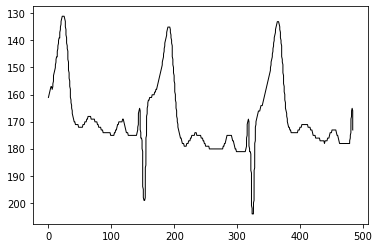

In [ ]:
#import measure
from skimage import measure
import scipy.ndimage as ndimage    

#finding contour
contours = measure.find_contours(binary_global,0.9)

# Shows the image with contours found
fig4, ax4 = plt.subplots()

plt.gca().invert_yaxis()

contours_shape = sorted([x.shape for x in contours])[::-1][0:1]
print(contours_shape)
for contour in contours:
  if contour.shape in contours_shape:
    test = resize(contour, (255, 2))
    ax4.plot(contour[:, 1], contour[:, 0],linewidth=1,color='black')
ax1.axis('image')
ax1.set_title("Sample pre-processed Leads 13 image")

In [ ]:
contours_shape = sorted([x.shape for x in contours])[::-1][0:3]
contours_shape

[(1003, 2), (911, 2), (17, 2)]

In [ ]:
test.shape

(255, 2)

#### **CONVERT IMAGE TO SIGNAL**

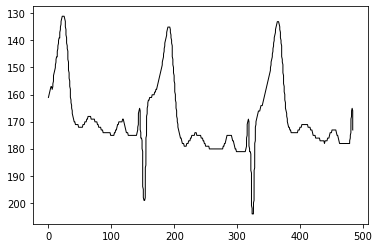

In [ ]:
#converting image to signal

#import pandas
import pandas as pd

#convert contour to dataframe
df = pd.DataFrame(test, columns = ['X','Y'])
fig5, ax5 = plt.subplots()

plt.gca().invert_yaxis()

#plot the image
ax5.plot(df['Y'],df['X'],linewidth=1,color='black',linestyle='solid')

#save the image
fig5.savefig('Lead13_Signal.png')

#### **SAVE SIGNAL TO CSV FORMAT**

In [ ]:
#convert to CSV
df.to_csv('data.csv',index=False)

#View CSV data for verification
test_df=pd.read_csv('data.csv')
test_df

,X,Y
0,173.1,484.0
1,173.0,483.9
2,172.0,483.9
3,171.0,483.9
4,170.0,483.9
...,...,...
950,159.1,2.0
951,160.0,1.1
952,160.1,1.0
953,161.0,0.1


#### **SCALING THE DATA & STORE IN CSV**

In [ ]:
#scaling the data and testing
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

fit_transform_data = scaler.fit_transform(df)
Normalized_Scaled=pd.DataFrame(fit_transform_data, columns = ['X','Y'])
Normalized_Scaled

,X,Y
0,0.575342,1.000000
1,0.573973,0.999793
2,0.560274,0.999793
3,0.546575,0.999793
4,0.532877,0.999793
...,...,...
950,0.383562,0.004132
951,0.395890,0.002273
952,0.397260,0.002066
953,0.409589,0.000207


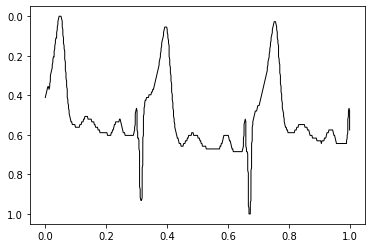

In [ ]:
#plotting scaled data to test signal shape
import pandas as pd

df = pd.DataFrame(Normalized_Scaled, columns = ['X','Y'])

fig6, ax6 = plt.subplots()

plt.gca().invert_yaxis()

ax6.plot(Normalized_Scaled['Y'],Normalized_Scaled['X'],linewidth=1,color='black',linestyle='solid')

In [ ]:
#scaled_data to CSV
Normalized_Scaled.to_csv('scaled_data.csv',index=False)
#reading CSV to test
test_scaled_df=pd.read_csv('scaled_data.csv')
test_scaled_df

,X,Y
0,0.575342,1.000000
1,0.573973,0.999793
2,0.560274,0.999793
3,0.546575,0.999793
4,0.532877,0.999793
...,...,...
950,0.383562,0.004132
951,0.395890,0.002273
952,0.397260,0.002066
953,0.409589,0.000207


In [ ]:
# For now save the X axis as a seperate csv file (1D) as it seems to corresponds the high and low points and y axis corresponds to curve/shape.
#scaled_data to CSV
Normalized_Scaled['X'].to_csv('scaled_data_X.csv',index=False)
#reading CSV to test
test_scaled_df_X=pd.read_csv('scaled_data_X.csv')
test_scaled_df_X.shape

(955, 1)

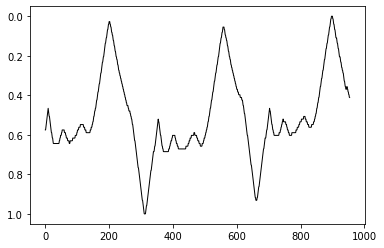

In [ ]:
#plotting 1D signal
import pandas as pd

test_plot_df = pd.DataFrame(test_scaled_df_X, columns = ['X'])
fig6, ax6 = plt.subplots()

plt.gca().invert_yaxis()

ax6.plot(test_plot_df,linewidth=1,color='black',linestyle='solid')

#### **TRANSPOSE THE DATAFRAME**

In [ ]:
#transpose the 1D scaled dataframe
test_transpose = test_scaled_df_X.T
test_transpose

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703,1704,1705,1706,1707,1708,1709,1710,1711,1712,1713,1714,1715,1716,1717,1718,1719,1720,1721,1722,1723,1724,1725,1726,1727,1728,1729,1730
X,0.859944,0.871148,0.87395,0.87395,0.87395,0.87395,0.87395,0.87395,0.885154,0.887955,0.887955,0.887955,0.887955,0.89916,0.901961,0.901961,0.913165,0.915966,0.915966,0.915966,0.915966,0.915966,0.915966,0.915966,0.915966,0.927171,0.929972,0.929972,0.929972,0.929972,0.929972,0.929972,0.929972,0.929972,0.927171,0.915966,0.915966,0.915966,0.913165,0.901961,...,0.829132,0.840336,0.843137,0.854342,0.857143,0.868347,0.868347,0.868347,0.868347,0.871148,0.882353,0.882353,0.882353,0.871148,0.868347,0.868347,0.868347,0.868347,0.868347,0.857143,0.854342,0.854342,0.854342,0.843137,0.840336,0.840336,0.840336,0.840336,0.840336,0.840336,0.829132,0.826331,0.826331,0.826331,0.826331,0.826331,0.826331,0.826331,0.826331,0.826331


#### **NOW WE HAVE BOTH CSV FILES AND CROPPED LEAD IMAGES(1-13) TO WORK ON. WE CAN PERFROM CNN on 1D & 2D images and perform different Supervised classification algorithms based on CSV DATA(KNN, LOGISTIC REGRESSION, SVM etc.**

### **NOW PERFORM DATA PREPROCESSING/FEATURE EXTRACTION ON  ALL THE FILES IN THE ECG_IMAGES FOLDER**

#### **FUNCTION TO EXTRACT IMAGE LEADS(1-13) (FEATURE EXTRACTION)**

In [ ]:
"""#### **FUNCTION FOR  IMAGE LEADS(1-13) PRE-PROCESSING**"""
def Convert_Image_Lead(image_file,parent_folder):
    #read the image
    image=imread('{parent}/{image_file}'.format(parent=str(parent_folder),image_file=str(image_file)),plugin='matplotlib')
    #dividing the ECG leads from 1-13 from the above image
    Lead_1 = image[300:600, 150:643]
    Lead_2 = image[300:600, 646:1135]
    Lead_3 = image[300:600, 1140:1626]
    Lead_4 = image[300:600, 1630:2125]
    Lead_5 = image[600:900, 150:643]
    Lead_6 = image[600:900, 646:1135]
    Lead_7 = image[600:900, 1140:1626]
    Lead_8 = image[600:900, 1630:2125]
    Lead_9 = image[900:1200, 150:643]
    Lead_10 = image[900:1200, 646:1135]
    Lead_11 = image[900:1200, 1140:1626]
    Lead_12 = image[900:1200, 1630:2125]
    Lead_13 = image[1250:1480, 150:2125]

    #list of leads
    Leads=[Lead_1,Lead_2,Lead_3,Lead_4,Lead_5,Lead_6,Lead_7,Lead_8,Lead_9,Lead_10,Lead_11,Lead_12,Lead_13]
    
    #folder_name to store lead_images
    folder_name= re.sub('.jpg', '',image_file)

    #loop through leads and create seperate images
    for x,y in enumerate(Leads):
      fig , ax = plt.subplots()
      #fig.set_size_inches(20, 20)
      ax.imshow(y)
      ax.axis('off')
      ax.set_title("Leads {0}".format(x+1))
      if (os.path.exists(parent_folder+'/'+folder_name)):
        pass
      else:
        os.makedirs(parent_folder+'/'+folder_name)

      #save the image
      plt.close('all')
      plt.ioff()
      fig.savefig('{parent}/{folder_name}/Lead_{x}_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent_folder))
     
    extract_signal_leads(Leads,folder_name,parent_folder)


#### **FUNCTION FOR  IMAGE LEADS(1-13) PRE-PROCESSING & EXTRACTING SIGNAL CONTOURS**

In [ ]:
#extract_only signal from images
def extract_signal_leads(Leads,folder_name,parent):
  #looping through image list containg all leads from 1-13
  for x,y in enumerate(Leads):
    #creating subplot
    fig1 , ax1 = plt.subplots()

    #set fig size
    #fig1.set_size_inches(20, 20)

    #converting to gray scale
    grayscale = color.rgb2gray(y)
    #smoothing image
    blurred_image = gaussian(grayscale,sigma=0.7)
    #thresholding to distinguish foreground and background
    #using otsu thresholding for getting threshold value
    global_thresh = threshold_otsu(blurred_image)

    #creating binary image based on threshold
    binary_global = blurred_image < global_thresh
    
    #resize image
    if x!=12:
      binary_global = resize(binary_global, (300, 450))

    ax1.imshow(binary_global,cmap="gray")
    ax1.axis('off')
    ax1.set_title("pre-processed Leads {} image".format(x+1))
    plt.close('all')
    plt.ioff()
    #save the image
    fig1.savefig('{parent}/{folder_name}/Lead_{x}_preprocessed_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent))

    fig7 , ax7 = plt.subplots()
    plt.gca().invert_yaxis()

    #find contour and get only the necessary signal contour
    contours = measure.find_contours(binary_global,0.8)
    contours_shape = sorted([x.shape for x in contours])[::-1][0:1]
    for contour in contours:
      if contour.shape in contours_shape:
        test = resize(contour, (255, 2))
        ax7.plot(test[:, 1], test[:, 0],linewidth=1,color='black')
    ax7.axis('image')
    ax7.set_title("Contour {} image".format(x+1))
    plt.close('all')
    plt.ioff()
    #save the image
    fig7.savefig('{parent}/{folder_name}/Lead_{x}_Contour_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent))    
    lead_no=x
    #convert_csv(test,lead_no,folder_name,parent)
    #scale_csv(test,lead_no,folder_name,parent)
    scale_csv_1D(test,lead_no,folder_name,parent)

####**FUNCTIONS FOR CSV CONVERSION AND SCALING**

In [ ]:
def convert_csv(test,lead_no,folder_name,parent):
#convert contour to dataframe
  target=folder_name[0:2]
  df = pd.DataFrame(test, columns = ['X','Y'])
  df['Target']=target
  #x_axis= 'Lead_{lead_no}_X'.format(lead_no=lead_no)
  #y_axis= 'Lead_{lead_no}_Y'.format(lead_no=lead_no)
  fig5, ax5 = plt.subplots()
  #convert to CSV
  df.to_csv('{parent}/{folder_name}/{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)

def scale_csv(test,lead_no,folder_name,parent):
  #scaling the data and testing
  target=folder_name[0:2]
  scaler = MinMaxScaler()
  fit_transform_data = scaler.fit_transform(test)
  Normalized_Scaled=pd.DataFrame(fit_transform_data, columns = ['X','Y'])
  Normalized_Scaled=Normalized_Scaled.T
  Normalized_Scaled['Target']=target
  #scaled_data to CSV
  if (os.path.isfile('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent))):
    Normalized_Scaled.to_csv('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent), mode='a', header=False,index=False)
  else:
    Normalized_Scaled.to_csv('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)

def scale_csv_1D(test,lead_no,folder_name,parent):
  target=folder_name[0:2]
  #scaling the data and testing
  scaler = MinMaxScaler()
  fit_transform_data = scaler.fit_transform(test)
  Normalized_Scaled=pd.DataFrame(fit_transform_data[:,0], columns = ['X'])
  fig6, ax6 = plt.subplots()
  plt.gca().invert_yaxis()
  ax6.plot(Normalized_Scaled,linewidth=1,color='black',linestyle='solid')
  plt.close('all')
  plt.ioff()
  fig6.savefig('{parent}/{folder_name}/ID_Lead_{lead_no}_Signal.png'.format(folder_name=folder_name,lead_no=lead_no+1,parent=parent))
  Normalized_Scaled=Normalized_Scaled.T
  Normalized_Scaled['Target']=target
  #scaled_data to CSV
  if (os.path.isfile('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent))):
    Normalized_Scaled.to_csv('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent), mode='a', header=False,index=False)
  else:
    Normalized_Scaled.to_csv('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)

#### **RUN THE BELOW CELL TO GENERATE THE NECESSARY FILES**

In [ ]:
import os
import re
from skimage.filters import threshold_otsu,gaussian
from skimage import measure
import pandas as pd
import numpy as nm
from sklearn.preprocessing import MinMaxScaler
from skimage.io import imread
from skimage import color
from skimage.transform import resize
from numpy import asarray
import matplotlib.pyplot as plt

"""#### **NOW WE HAVE BOTH CSV FILES AND CROPPED LEAD IMAGES(1-13) TO WORK ON. WE CAN PERFROM CNN on 1D images & 2D images and perform different Supervised classification algorithms based on CSV DATA(KNN, LOGISTIC REGRESSION, SVM etc. and also different clustering techniques without target to check predictions**

### **NOW PERFORM DATA PREPROCESSING/FEATURE EXTRACTION ON  ALL THE FILES IN THE ECG_IMAGES FOLDER**

#### **FUNCTION TO EXTRACT IMAGE LEADS(1-13) (FEATURE EXTRACTION)**
"""

"""####**FUNCTIONS FOR CSV CONVERSION AND SCALING**"""

#extract_only signal from images
def extract_signal_leads(Leads,folder_name,parent):
  #looping through image list containg all leads from 1-13
  for x,y in enumerate(Leads):
    #creating subplot
    fig1 , ax1 = plt.subplots()

    #set fig size
    #fig1.set_size_inches(20, 20)

    #converting to gray scale
    grayscale = color.rgb2gray(y)
    #smoothing image
    blurred_image = gaussian(grayscale,sigma=0.7)
    #thresholding to distinguish foreground and background
    #using otsu thresholding for getting threshold value
    global_thresh = threshold_otsu(blurred_image)

    #creating binary image based on threshold
    binary_global = blurred_image < global_thresh
    
    #resize image
    if x!=12:
      binary_global = resize(binary_global, (300, 450))

    ax1.imshow(binary_global,cmap="gray")
    ax1.axis('off')
    ax1.set_title("pre-processed Leads {} image".format(x+1))
    plt.close('all')
    plt.ioff()
    #save the image
    fig1.savefig('{parent}/{folder_name}/Lead_{x}_preprocessed_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent))

    fig7 , ax7 = plt.subplots()
    plt.gca().invert_yaxis()

    #find contour and get only the necessary signal contour
    contours = measure.find_contours(binary_global,0.8)
    contours_shape = sorted([x.shape for x in contours])[::-1][0:1]
    for contour in contours:
      if contour.shape in contours_shape:
        test = resize(contour, (255, 2))
        ax7.plot(test[:, 1], test[:, 0],linewidth=1,color='black')
    ax7.axis('image')
    ax7.set_title("Contour {} image".format(x+1))
    plt.close('all')
    plt.ioff()
    #save the image
    fig7.savefig('{parent}/{folder_name}/Lead_{x}_Contour_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent))    
    lead_no=x
    #convert_csv(test,lead_no,folder_name,parent)
    #scale_csv(test,lead_no,folder_name,parent)
    scale_csv_1D(test,lead_no,folder_name,parent)

"""#### **FUNCTION FOR  IMAGE LEADS(1-13) PRE-PROCESSING**"""
def Convert_Image_Lead(image_file,parent_folder):
    #read the image
    image=imread('{parent}/{image_file}'.format(parent=str(parent_folder),image_file=str(image_file)),plugin='matplotlib')
    #dividing the ECG leads from 1-13 from the above image
    Lead_1 = image[300:600, 150:643]
    Lead_2 = image[300:600, 646:1135]
    Lead_3 = image[300:600, 1140:1626]
    Lead_4 = image[300:600, 1630:2125]
    Lead_5 = image[600:900, 150:643]
    Lead_6 = image[600:900, 646:1135]
    Lead_7 = image[600:900, 1140:1626]
    Lead_8 = image[600:900, 1630:2125]
    Lead_9 = image[900:1200, 150:643]
    Lead_10 = image[900:1200, 646:1135]
    Lead_11 = image[900:1200, 1140:1626]
    Lead_12 = image[900:1200, 1630:2125]
    Lead_13 = image[1250:1480, 150:2125]

    #list of leads
    Leads=[Lead_1,Lead_2,Lead_3,Lead_4,Lead_5,Lead_6,Lead_7,Lead_8,Lead_9,Lead_10,Lead_11,Lead_12,Lead_13]
    
    #folder_name to store lead_images
    folder_name= re.sub('.jpg', '',image_file)

    #loop through leads and create seperate images
    for x,y in enumerate(Leads):
      fig , ax = plt.subplots()
      #fig.set_size_inches(20, 20)
      ax.imshow(y)
      ax.axis('off')
      ax.set_title("Leads {0}".format(x+1))
      if (os.path.exists(parent_folder+'/'+folder_name)):
        pass
      else:
        os.makedirs(parent_folder+'/'+folder_name)

      #save the image
      plt.close('all')
      plt.ioff()
      fig.savefig('{parent}/{folder_name}/Lead_{x}_Signal.png'.format(folder_name=folder_name,x=x+1,parent=parent_folder))
     
    extract_signal_leads(Leads,folder_name,parent_folder)


def convert_csv(test,lead_no,folder_name,parent):
#convert contour to dataframe
  target=folder_name[0:2]
  df = pd.DataFrame(test, columns = ['X','Y'])
  df['Target']=target
  #x_axis= 'Lead_{lead_no}_X'.format(lead_no=lead_no)
  #y_axis= 'Lead_{lead_no}_Y'.format(lead_no=lead_no)
  fig5, ax5 = plt.subplots()
  #convert to CSV
  df.to_csv('{parent}/{folder_name}/{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)

def scale_csv(test,lead_no,folder_name,parent):
  #scaling the data and testing
  target=folder_name[0:2]
  scaler = MinMaxScaler()
  fit_transform_data = scaler.fit_transform(test)
  Normalized_Scaled=pd.DataFrame(fit_transform_data, columns = ['X','Y'])
  Normalized_Scaled=Normalized_Scaled.T
  Normalized_Scaled['Target']=target
  #scaled_data to CSV
  if (os.path.isfile('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent))):
    Normalized_Scaled.to_csv('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent), mode='a', header=False,index=False)
  else:
    Normalized_Scaled.to_csv('{parent}/Scaled_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)

def scale_csv_1D(test,lead_no,folder_name,parent):
  target=folder_name[0:2]
  #scaling the data and testing
  scaler = MinMaxScaler()
  fit_transform_data = scaler.fit_transform(test)
  Normalized_Scaled=pd.DataFrame(fit_transform_data[:,0], columns = ['X'])
  fig6, ax6 = plt.subplots()
  plt.gca().invert_yaxis()
  ax6.plot(Normalized_Scaled,linewidth=1,color='black',linestyle='solid')
  plt.close('all')
  plt.ioff()
  fig6.savefig('{parent}/{folder_name}/ID_Lead_{lead_no}_Signal.png'.format(folder_name=folder_name,lead_no=lead_no+1,parent=parent))
  Normalized_Scaled=Normalized_Scaled.T
  Normalized_Scaled['Target']=target
  #scaled_data to CSV
  if (os.path.isfile('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent))):
    Normalized_Scaled.to_csv('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent), mode='a', header=False,index=False)
  else:
    Normalized_Scaled.to_csv('{parent}/scaled_data_1D_{lead_no}.csv'.format(lead_no=lead_no+1,parent=parent,folder_name=folder_name),index=False)
  
#load the different types of folders
normal_parent_dir = '/content/drive/MyDrive/CMPE255_PROJECT/ECG_IMAGES_UNZIPPED/Normal Person ECG Images (284x12=3408)/'
abnormal_parent_dir = '/content/drive/MyDrive/CMPE255_PROJECT/ECG_IMAGES_UNZIPPED/ECG Images of Patient that have abnormal heartbeat (233x12=2796)'
MI_parent_dir = '/content/drive/MyDrive/CMPE255_PROJECT/ECG_IMAGES_UNZIPPED/ECG Images of Myocardial Infarction Patients (240x12=2880)'
MI_history_parent_dir = '/content/drive/MyDrive/CMPE255_PROJECT/ECG_IMAGES_UNZIPPED/ECG Images of Patient that have History of MI (172x12=2064)'

#Types of heart. Now taking only 3. will work on COVID-19 later
Types_ECG = {'Abnormal_hear_beat':abnormal_parent_dir,'MI':MI_parent_dir,'History_MI':MI_history_parent_dir,'Normal':normal_parent_dir}

#Types_ECG_test = {'Abnormal':abnormal_parent_dir}

#### parse all the files in the different folders and peform all the above steps as mentioned in the analysis Sample.

#loop through folder/files and create seperate images of different leads
for types,folder in Types_ECG.items():
  for files in os.listdir(folder):
    #if files.endswith(".jpg"):
    with open(os.path.join(folder, files), 'r') as f:
      Convert_Image_Lead(files,folder)

##  **LINK TO NEXT COLAB: https://colab.research.google.com/drive/1XXYUS9YuNvRUx-2VHZw1RzneUty8gEhd?usp=sharing**